In [1]:
from figures.utils import (
    plot_combined_heads,
    plot_kl_divergence_simple,
    fetch_run_data
)

/Users/rodrigoalvarezlucendo/Desktop/ar-classification/.venv/lib/python3.12/site-packages/pydantic/_internal/_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'repr' attribute with value False was provided to the `Field()` function, which has no effect in the context it was used. 'repr' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotated` type alias using the `type` statement was used, or if the `Field()` function was attached to a single member of a union type.
  warnings.warn(
/Users/rodrigoalvarezlucendo/Desktop/ar-classification/.venv/lib/python3.12/site-packages/pydantic/_internal/_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'frozen' attribute with value True was provided to the `Field()` function, which has no effect in the context it was used. 'frozen' is field-specific metadata, and can only be attached to a model field using `Annotated` m

In [2]:
# Configuration - Update these parameters as needed
run_id = "dbrr8opu"
attention_steps = [0, 60, 300, 1000]
divergence_steps = [2065, 2450]
max_steps = 3000
save_attention = None  # Set to string to save attention plots, None to display
figsize = (12, 8)

In [3]:
data = fetch_run_data(run_id, metrics=["val_loss"])
cfg = data["config"]

In [4]:
student_cfg = cfg["student"]
student_cfg
full_dissect_keys = [
    "dropout",
    "use_key_projection",
    "layer_normalization",
    "use_mlp",
    "teacher_readout",
    "use_output_projection",
    "skip_connection",
    "attention_disentanglement",
    "pe_type",
    # "identity_decoder",
    "attention_bias"
]

for key in full_dissect_keys:
    print(f"{key}: {student_cfg[key]}")

dropout: 0.1
use_key_projection: True
layer_normalization: True
use_mlp: True
teacher_readout: False
use_output_projection: True
skip_connection: True
attention_disentanglement: False
pe_type: absolute
attention_bias: False


## 1. Combined Attention Heads Visualization

This plot shows the combined attention patterns across different heads using color overlays.

Loading from cache: 5045243d66d01015603909166104f027.pkl
Loading from cache: c17f7284a36ba6ba31d17612bc9fd068.pkl
Loading from cache: bc257a52f668dea82948e183eef49aa2.pkl
Loading from cache: 094c4e9b9290628ab968b0e795571389.pkl
Saved figure to figures/full-model/results/full-model-combined-heads.png.pdf


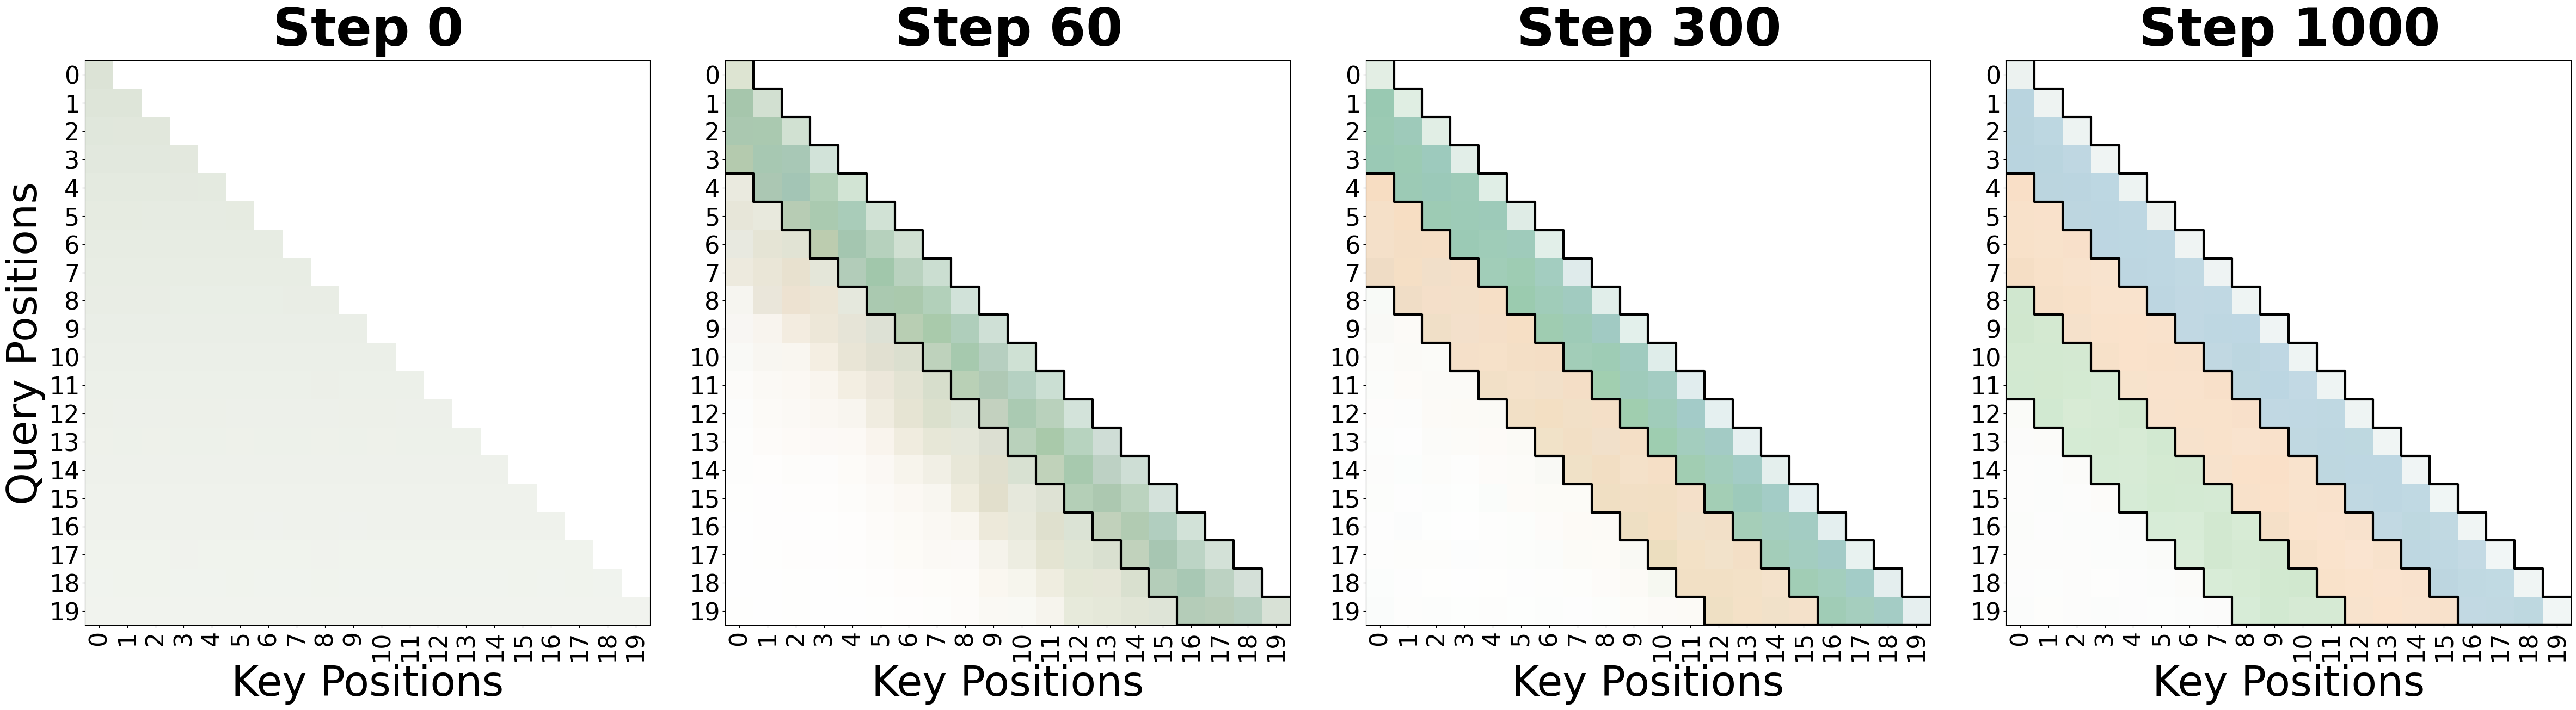

In [10]:
plot_combined_heads(
    f"run-{run_id}-val_attention_weights",
    steps=attention_steps,
    split="val",
    save_name="figures/full-model/results/full-model-combined-heads.png",
    head_colors={2: "#2ca02c", 0: "#ff7f0e", 1: "#1f77b4"},
    diagonal_offsets={1: [0, -4], 2: [0, -4, -8], 3: [0, -4, -8, -12]},
)

## 2. KL Divergence - Learned Model

This plot shows the KL divergence between the learned model and teacher across different n-gram prefixes.

Saved figure to figures/full-model/results/full-model-kl-ngrams.png.pdf


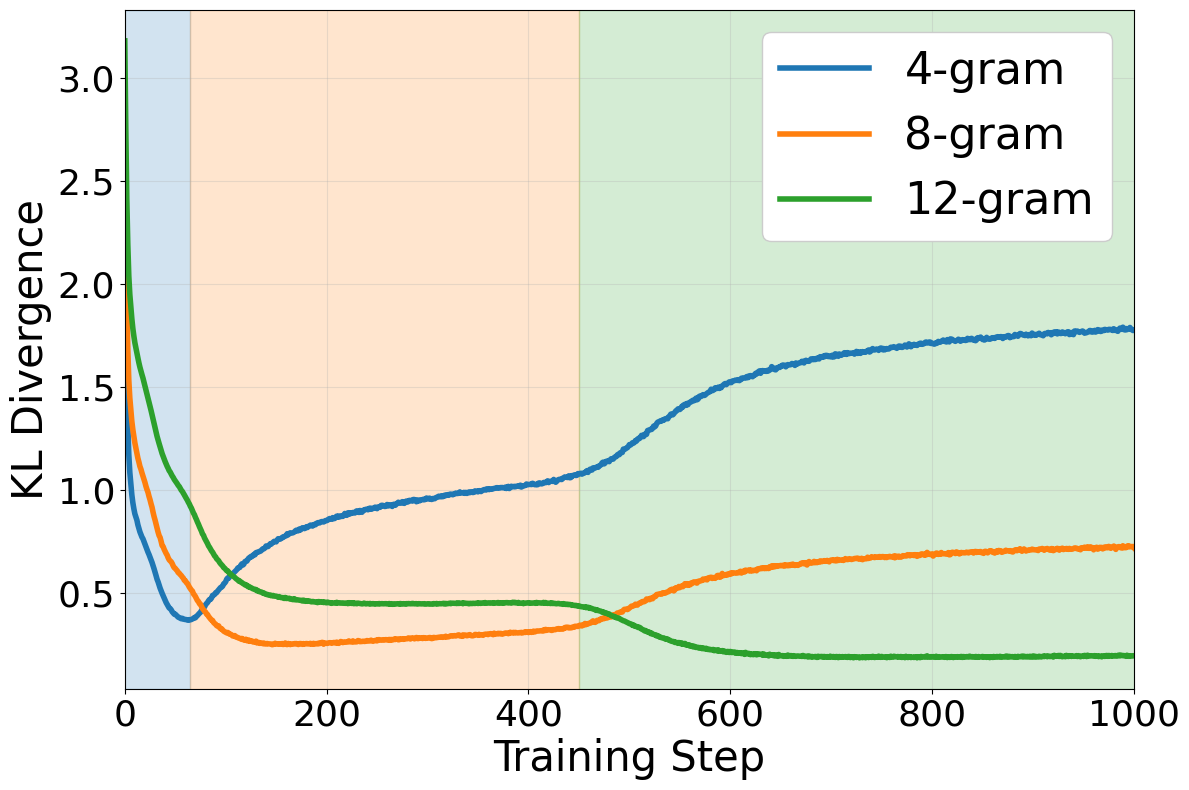

In [6]:
plot_kl_divergence_simple(
    run_id=run_id,
    divergence_steps=divergence_steps,
    max_steps=max_steps,
    figsize=figsize,
    learnable=True,
    save_name="figures/full-model/results/full-model-kl-ngrams.png"
)

Saved figure to figures/full-model/results/full-model-kl-teacher.png.pdf


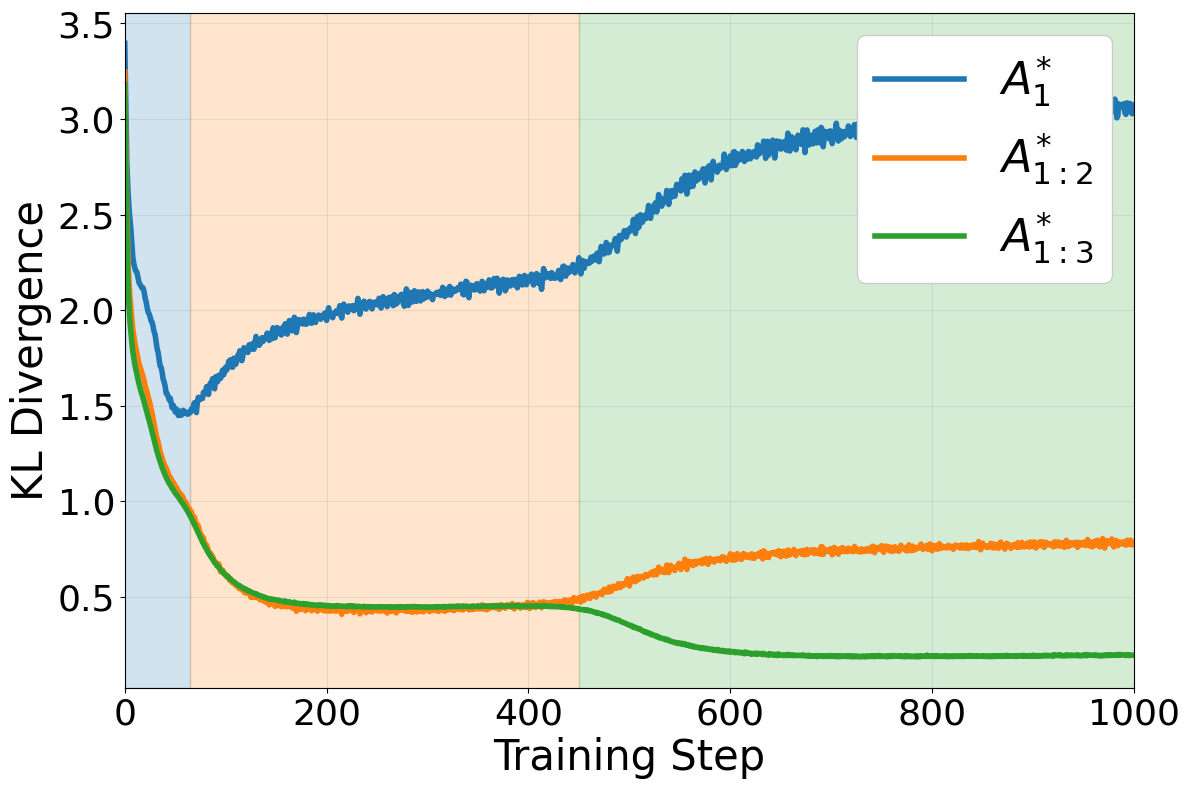

In [7]:
plot_kl_divergence_simple(
    run_id=run_id,
    divergence_steps=divergence_steps,
    max_steps=max_steps,
    figsize=figsize,
    learnable=False,
     save_name="figures/full-model/results/full-model-kl-teacher.png"
)